# Linear Regression task to determine student's percentage

## About the model

Linear regression strives to show the relationship between two variables by applying a linear equation to observed data. One variable is supposed to be an independent variable, and the other is to be a dependent variable. For example, the weight of the person is linearly related to his height. Hence this shows a linear relationship between the height and weight of the person. As the height is increased, the weight of the person also gets increased.

### Equation about model

A linear regression line equation is written in the form of:

Y = a + bX

where X is the independent variable and plotted along the x-axis

Y is the dependent variable and plotted along the y-axis

The slope of the line is b, and a is the intercept (the value of y when x = 0).

** Here a is a constant and b is referred to as regression coefficient **

### Including libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### All about our dataset

In [2]:
data = pd.read_csv("student_scores.csv")
data.head(5) # prints the first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In our dataset there are 2 variables (i.e. Hours and Scores) ,here Hours is independent variable and Scores is the dependent variable (Scores is the variable to be predicted).

#### 2D graph Representation of the data

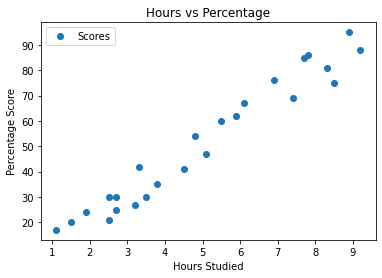

In [3]:
data.plot(x = 'Hours',y = 'Scores',style = 'o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Model Preparations

Step 1 : Getting the formatted data to train/test our model

In [4]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
x,y # Here x is hours and y is the scores for corresponding hours

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

Step 2 : Dividing the data into parts for training and prediction of models

In [5]:
from sklearn.model_selection import train_test_split
# spliting the data into 70:30 70% training 30% test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
len(x_train),len(x_test)

(17, 8)

## Training the model

In [6]:
from sklearn.linear_model import LinearRegression
regres = LinearRegression()
regres.fit(x_train,y_train)
print('Model trained!!')

Model trained!!


Getting info about our model object

In [7]:
dir(regres)[-15:]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

Important parameters of our linearRegression model objects are :-
- coef_ = regression coefficient
- intercept_ = regression constant
- predict = method to predict output on the basis of test data

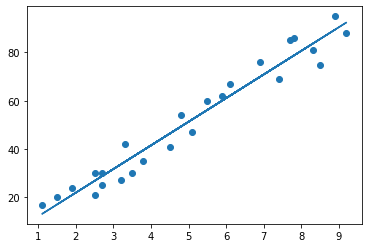

In [8]:
# Plotting the Points and our regression line
'Line Equation - y = mx+c'
line = regres.coef_*x+regres.intercept_
plt.plot(x,line)
plt.scatter(x,y)
plt.show()

## Making Predictions

In [9]:
y_pred = regres.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [10]:
# Comparison of Actual and Predicted data
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':y_test-y_pred})
df

,Actual,Predicted,Error
0,20,17.053665,2.946335
1,27,33.694229,-6.694229
2,69,74.806209,-5.806209
3,30,26.842232,3.157768
4,62,60.123359,1.876641
5,35,39.567369,-4.567369
6,24,20.969092,3.030908
7,86,78.721636,7.278364


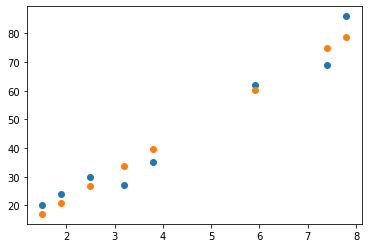

In [11]:
# viewing the actual and predicted points
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.show()

In [12]:
# predicted score if a student studies 9.25 hrs/day
hrs = [[9.25]]
pred = regres.predict(hrs)
print('Score obtained by the student:',pred[0])

Score obtained by the student: 92.91505723477056


## Evaluating the model

For evaluating regression models sklearn module have many metrics to evaluate the model. we are gonna try following metrics to understand about our model better :-

- mean absolute error
- mean squared error
- root mean squared error
- r2 score

In [13]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

4.419727808027652

In [14]:
# mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared = True)

22.96509721270043

In [15]:
# root mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared = False)

4.792191274636315

In [16]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# best possible value- 1.0 and worst possible value-0.0

0.9568211104435257